In [1]:
import numpy as np
import matplotlib.pyplot as plt
from openmm import unit

# Two LJ atoms in vacuum

Let's take two Lennard_Jones atoms in a periodic cubic box with the following parameters:

In [2]:
# Particle 1 with Ar atom values
mass_1 = 39.948 * unit.amu
sigma_1 = 3.404 * unit.angstroms
epsilon_1 = 0.238 * unit.kilocalories_per_mole

# Particle 2 with Xe atom values
mass_2 = 131.293 * unit.amu
sigma_2 = 3.961 * unit.angstroms
epsilon_2 = 0.459 * unit.kilocalories_per_mole

Construction of reduced sigma and epsilon:

$$
\sigma_{red} = \frac{\sigma_{1}+\sigma_{2}}{2}
$$ (sigma_red)

$$
\epsilon_{red} = \sqrt{\epsilon_{1} \epsilon_{2}}
$$ (epsilon_red)

In [3]:
reduced_sigma = 0.5*(sigma_1+sigma_2)
reduced_epsilon = np.sqrt(epsilon_1*epsilon_2)

Reduced mass of a two particles system with masses $m_1$ and $m_2$:

$$
m_{red} = \frac{m_{1} * m_{2}}{m_{1} + m_{2}}
$$ (mass_red)

In [4]:
reduced_mass = (mass_1*mass_2) / (mass_1+mass_2)

Position of minimum:

$$
x_{min} = 2^{1/6} \sigma_{red}
$$ (x_min)

In [5]:
x_min = 2**(1/6)*reduced_sigma

In [6]:
x_min

Quantity(value=4.133466492899267, unit=angstrom)

Time period of small oscillations around the minimum:

$$
\tau = \frac{\pi}{3·2^{1/3}} \sqrt{\frac{m_{red}\sigma_{red}^2}{\epsilon_{red}}}
$$ (tau)

In [7]:
tau = (np.pi/(3*2**(1/3))) * np.sqrt((reduced_mass*reduced_sigma**2)/reduced_epsilon)
print(tau)

1.4404534295370355 ps


Or taking $\tau/\sqrt(2)$ as reference for the sake of the integration time step threshold estimation:

In [8]:
print(tau/np.sqrt(2))

1.0185543880090564 ps


Potential energy surface:

In [9]:
def LJ (x, sigma, epsilon):
    
    t = sigma/x
    t6 = t**6
    t12 = t6**2
    
    return 4.0*epsilon*(t12-t6)

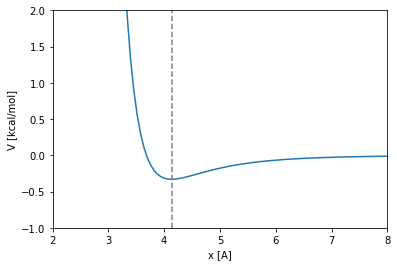

In [10]:
xlim_figure = [2.0, 8.0]
ylim_figure = [-1.0, 2.0]

x = np.linspace(xlim_figure[0], xlim_figure[1], 100, True) * unit.angstrom

plt.plot(x, LJ(x, reduced_sigma, reduced_epsilon))
plt.vlines(x_min._value, ylim_figure[0], ylim_figure[1], linestyles='dashed', color='gray')
plt.xlim(xlim_figure)
plt.ylim(ylim_figure)
plt.xlabel('x [{}]'.format(x.unit.get_symbol()))
plt.ylabel('V [{}]'.format(reduced_epsilon.unit.get_symbol()))
plt.show()

-------------

**Sources**

http://docs.openmm.org/6.3.0/userguide/theory.html#lennard-jones-interaction
https://openmmtools.readthedocs.io/en/0.18.1/api/generated/openmmtools.testsystems.LennardJonesPair.html
https://openmmtools.readthedocs.io/en/latest/api/generated/openmmtools.testsystems.LennardJonesFluid.html
https://gpantel.github.io/computational-method/LJsimulation/